COMBINATION OF TF IDF AND RANDOM FOREST

SPECS FOR EACH USECASE
https://us.dynabook.com/computers/research-center/shopping-guides/laptop-buying-guide/types-of-laptops/ 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #to visualise
import seaborn as sns

import nltk #to vectorizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer #to find the similarity

### 1. DATA LOADING

In [2]:
laptop = pd.read_csv('dataset/laptops.csv')

In [3]:
laptop.columns

Index(['laptop_id', 'name', 'price', 'processor', 'ram', 'os', 'storage',
       'img_link', 'display', 'rating', 'no_of_ratings', 'no_of_reviews',
       'laptop_brand', 'os_brand', 'processor_brand', 'usecases'],
      dtype='object')

In [4]:
laptop.dtypes

laptop_id            int64
name                object
price                int64
processor           object
ram                 object
os                  object
storage             object
img_link            object
display            float64
rating             float64
no_of_ratings      float64
no_of_reviews      float64
laptop_brand        object
os_brand            object
processor_brand     object
usecases            object
dtype: object

In [5]:
laptop.shape 

(796, 16)

DATA VISUALISE

### 2. DATA PREPROCESSING

In [6]:
#Checking NULL value
laptop.isnull().sum()

laptop_id            0
name                 0
price                0
processor            0
ram                  0
os                   0
storage              0
img_link             0
display              0
rating             266
no_of_ratings      266
no_of_reviews      266
laptop_brand         0
os_brand             0
processor_brand      0
usecases             0
dtype: int64

In [7]:
laptop.duplicated().sum() #Checking DUPLICATE rows

0

In [8]:
laptop.drop(columns=['no_of_ratings', 'no_of_reviews', 'rating', 'os', 'processor_brand'], inplace=True) #To drop column

In [9]:
laptop.isnull().sum()

laptop_id       0
name            0
price           0
processor       0
ram             0
storage         0
img_link        0
display         0
laptop_brand    0
os_brand        0
usecases        0
dtype: int64

In [10]:
laptop.shape

(796, 11)

In [11]:
laptop.dropna(inplace=True)


In [12]:
laptop.shape #total instances have been reduced

(796, 11)

In [13]:
laptop.dtypes

laptop_id         int64
name             object
price             int64
processor        object
ram              object
storage          object
img_link         object
display         float64
laptop_brand     object
os_brand         object
usecases         object
dtype: object

### --- END OF DATA PREPROCESSING ---
### 3. DATA TRANSFORMATION

In [14]:
laptop.columns

Index(['laptop_id', 'name', 'price', 'processor', 'ram', 'storage', 'img_link',
       'display', 'laptop_brand', 'os_brand', 'usecases'],
      dtype='object')

In [15]:
laptop.rename(columns={'laptop_brand': 'brand', 'os_brand': 'os'}, inplace=True)

#### 3.1. DISPLAY

In [16]:
laptop['display'] = laptop['display'].astype(int)
sorted(laptop['display'].unique())

[11, 12, 13, 14, 15, 16, 17, 35]

In [17]:
laptop['display'] = laptop['display'].astype(str) #convert to string
laptop['display'] = laptop['display'].apply(lambda x: f'{x}inch')
print(laptop['display'].value_counts())

display
15inch    420
14inch    195
16inch     72
13inch     69
17inch     27
11inch     10
35inch      2
12inch      1
Name: count, dtype: int64


#### 3.2. PRICE

In [18]:
#Price Conversion
laptop['price'] = laptop['price'] * 0.055   

laptop[['price']].head(2)  

,price
0,3464.45
1,8909.45


In [19]:
'''laptop['price'] = laptop['price'].astype(str) #convert to string

#add RM in front of str
laptop['price'] = laptop['price'].apply(lambda x: f'RM{x}')

print(laptop['price'].value_counts())'''

"laptop['price'] = laptop['price'].astype(str) #convert to string\n\n#add RM in front of str\nlaptop['price'] = laptop['price'].apply(lambda x: f'RM{x}')\n\nprint(laptop['price'].value_counts())"

#### 3.3. STORAGE

In [20]:
laptop['storage'] = laptop['storage'].str.extract('(\d+)').astype(int)
print(laptop['storage'].value_counts())
print("---AFTER---")
laptop['storage'] = laptop['storage'].apply(lambda x: 1000 if x == 1 else x)
laptop['storage'] = laptop['storage'].apply(lambda x: 2000 if x == 2 else x)
laptop['storage'] = laptop['storage'].apply(lambda x: 1000 if x == 4 else x)
laptop['storage'] = laptop['storage'].apply(lambda x: 1000 if x == 5 else x)

laptop['storage'] = laptop['storage'].apply(lambda x: f'{x}GB')
laptop['storage'] = laptop['storage'].astype(str)
print(laptop['storage'].value_counts())

storage
512    452
1      226
256     95
2       12
128      8
4        2
5        1
Name: count, dtype: int64
---AFTER---
storage
512GB     452
1000GB    229
256GB      95
2000GB     12
128GB       8
Name: count, dtype: int64


#### 3.4. USECASE

In [21]:
print(laptop['usecases'].value_counts())

usecases
 Gaming                      263
 Business/Professional       163
 Home/Everyday use           100
 Budget Friendly              68
 Creative/Design              64
 Student/Education            54
 Multimedia/Entertainment     48
Ultra-portable                36
Name: count, dtype: int64


In [22]:
laptop['usecases'] = laptop['usecases'].replace(' Gaming', 'Gaming')
laptop['usecases'] = laptop['usecases'].replace(' Business/Professional', 'Office')
laptop['usecases'] = laptop['usecases'].replace(' Budget Friendly', 'Office')
laptop['usecases'] = laptop['usecases'].replace(' Home/Everyday use', 'Hybrid')
laptop['usecases'] = laptop['usecases'].replace(' Student/Education', 'Hybrid')
laptop['usecases'] = laptop['usecases'].replace(' Creative/Design', 'Hybrid')
laptop['usecases'] = laptop['usecases'].replace(' Multimedia/Entertainment', 'Hybrid')
laptop['usecases'] = laptop['usecases'].replace('Ultra-portable', 'Hybrid')

print(laptop['usecases'].value_counts())

usecases
Hybrid    302
Gaming    263
Office    231
Name: count, dtype: int64


#### 3.5. RAM

In [23]:
laptop['ram'] = laptop['ram'].str.extract('(\d+)').astype(str)
print(laptop['ram'].value_counts())

laptop['ram'] = laptop['ram'].apply(lambda x: f'{x}RAM')

print('---AFTER---',laptop['ram'].value_counts())

ram
8     386
16    314
4      61
32     35
Name: count, dtype: int64
---AFTER--- ram
8RAM     386
16RAM    314
4RAM      61
32RAM     35
Name: count, dtype: int64


#### 3.6. CPU

In [24]:
laptop['cpu'] = laptop['processor']

print(laptop['cpu'].value_counts())

cpu
AMD Ryzen 7 Octa Core Processor                 81
Intel Core i5 Processor (12th Gen)              81
AMD Ryzen 5 Hexa Core Processor                 76
Intel Core i3 Processor (11th Gen)              73
Intel Core i5 Processor (11th Gen)              72
Intel Core i7 Processor (12th Gen)              63
Intel Core i5 Processor (10th Gen)              30
Intel Core i3 Processor (10th Gen)              29
Intel Core i7 Processor (11th Gen)              26
Intel Core i7 Processor (10th Gen)              26
Intel Celeron Dual Core Processor               23
AMD Ryzen 3 Dual Core Processor                 20
AMD Ryzen 9 Octa Core Processor                 20
Intel Core i5 Processor (8th Gen)               16
Apple M1 Processor                              13
Apple M2 Processor                              13
Intel Core i9 Processor (12th Gen)              13
Intel Core i3 Processor (12th Gen)              12
AMD Ryzen 5 Quad Core Processor                 11
AMD Ryzen 3 Quad Core Proce

In [25]:
#intel
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'i3' if 'i3' in str(x).lower() else x)
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'i5' if 'i5' in str(x).lower() else x)
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'i7' if 'i7' in str(x).lower() else x)
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'i9' if 'i9' in str(x).lower() else x)

#ryzen
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'ryzen 3' if 'ryzen 3' in str(x).lower() else x)
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'ryzen 5' if 'ryzen 5' in str(x).lower() else x)
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'ryzen 7' if 'ryzen 7' in str(x).lower() else x)
laptop['cpu'] = laptop['cpu'].apply(lambda x: 'ryzen 9' if 'ryzen 9' in str(x).lower() else x)

#others
keywords = ['m1','m2']
laptop['cpu'] = laptop['cpu'].apply(
    lambda x: 'apple' if any(keyword in str(x).lower() for keyword in keywords) else x)
keywords = ['pentium', 'celeron', 'qualcomm', 'mediatek', 'amd']
laptop['cpu'] = laptop['cpu'].apply(
    lambda x: 'integrated' if any(keyword in str(x).lower() for keyword in keywords) else x)


In [26]:
print(laptop['cpu'].value_counts())

cpu
i5            209
i7            132
i3            116
ryzen 5        91
ryzen 7        85
integrated     48
apple          36
ryzen 3        31
ryzen 9        24
i9             24
Name: count, dtype: int64


In [27]:
laptop.dtypes

laptop_id      int64
name          object
price        float64
processor     object
ram           object
storage       object
img_link      object
display       object
brand         object
os            object
usecases      object
cpu           object
dtype: object

In [28]:
laptop.columns

Index(['laptop_id', 'name', 'price', 'processor', 'ram', 'storage', 'img_link',
       'display', 'brand', 'os', 'usecases', 'cpu'],
      dtype='object')

In [29]:
#STORE DF INTO CSV SO CAN DISPLAY TO STREAMLIT

new_csv = laptop[['laptop_id','img_link','name','price','brand','usecases', 'processor','ram', 'os', 'storage']]	
print(new_csv.shape) #reduced dataset, same as laptops
#new_csv.rename(columns={'laptop_brand': 'brand', 'usecases': 'use'}, inplace=True)

(796, 10)


In [30]:
laptop.head(1)

,laptop_id,name,price,processor,ram,storage,img_link,display,brand,os,usecases,cpu
0,0,Lenovo Intel Core i5 11th Gen,3464.45,Intel Core i5 Processor (11th Gen),16RAM,512GB,https://rukminim1.flixcart.com/image/312/312/x...,15inch,Lenovo,Windows,Office,i5


### --- END OF DATA TRANSFORMATION ---

### --- DATA VISUALISATION, EDA ---

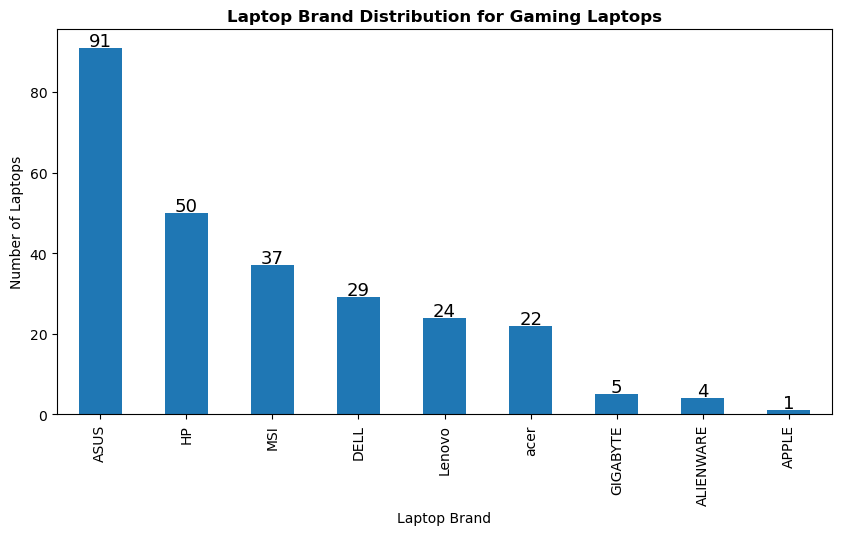

In [31]:
gaming_laptops = laptop[laptop['usecases'] == 'Gaming']

# Count the occurrences of each brand for gaming laptops
brand_counts = gaming_laptops['brand'].value_counts()

# Create the bar plot (Optional: Adjust figure size)
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
ax = brand_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Laptop Brand', fontsize=10)
plt.ylabel('Number of Laptops', fontsize=10)
plt.title('Laptop Brand Distribution for Gaming Laptops', fontsize=12, weight='bold')

# Adding annotations for each bar
for i, value in enumerate(brand_counts):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=13)
    
# Display the plot
plt.show()

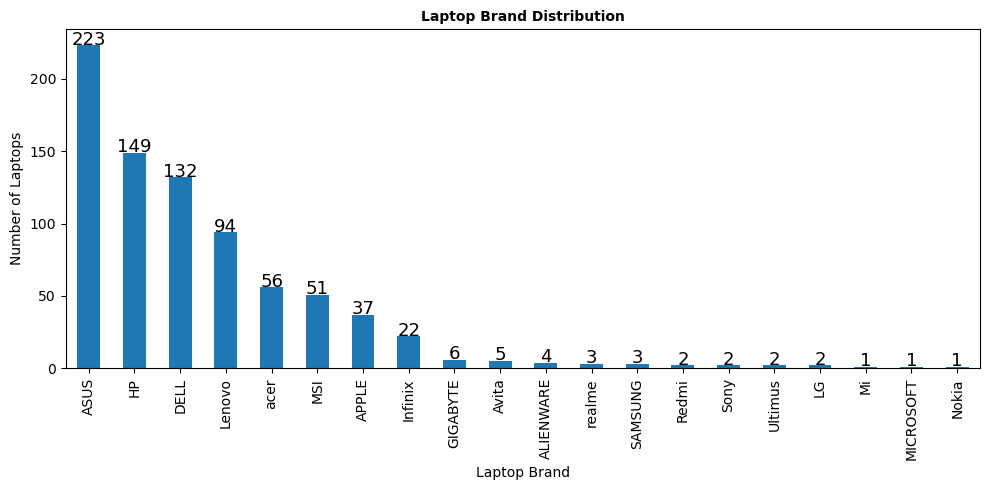

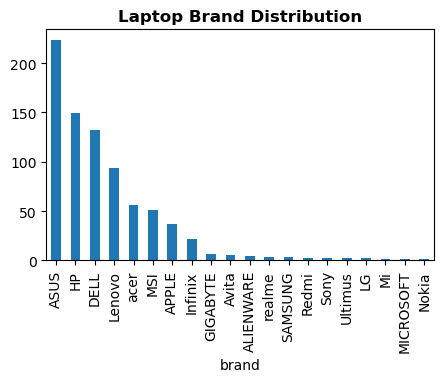

In [32]:
#to count the occurrences of each brand
brand_counts = laptop['brand'].value_counts()
#create the bar plot OPTIONAL
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
ax = brand_counts.plot(kind='bar')
#ax = brand_counts.plot(kind='bar', color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Laptop Brand', fontsize=10)
plt.ylabel('Number of Laptops', fontsize=10)
plt.title('Laptop Brand Distribution', fontsize=10, weight='bold')


# Adding annotations for each bar
for i, value in enumerate(brand_counts):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))  # Optional: Adjust figure size
ax = brand_counts.plot(kind='bar')
# Add a title
plt.title('Laptop Brand Distribution', fontsize=12, weight='bold')

# Show the pie chart
plt.show()

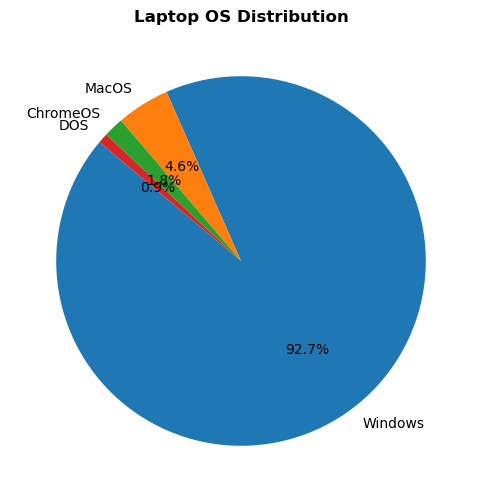

In [33]:
usecase_counts = laptop['os'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size
plt.pie(
    usecase_counts, 
    labels=usecase_counts.index,  # Add labels for each use case
    autopct='%1.1f%%',  # Display percentages with 1 decimal point
    startangle=140,  # Rotate chart for better appearance
    colors=plt.cm.tab10.colors  # Optional: Use a color map
)

# Add a title
plt.title('Laptop OS Distribution', fontsize=12, weight='bold')

# Show the pie chart
plt.show()

In [ ]:
# Count the occurrences of each use case
usecase_counts = laptop['os'].value_counts()

# Create the pie chart
def func(pct, allvalues):
    absolute = round(pct / 100.*sum(allvalues), 0)  # Calculate the absolute count
    return f"{absolute} ({pct:.1f}%)"  # Return formatted string

plt.figure(figsize=(6, 6))  # Adjust figure size
plt.pie(
    usecase_counts, 
    labels=usecase_counts.index,  # Add labels for each use case
    autopct=lambda pct: func(pct, usecase_counts),  # Use the custom function
    startangle=140,  # Rotate chart for better appearance
    colors=plt.cm.tab10.colors  # Optional: Use a color map
)
plt.title('Laptop OS Distribution', fontsize=12, weight='bold')  # Add the title
plt.show() 

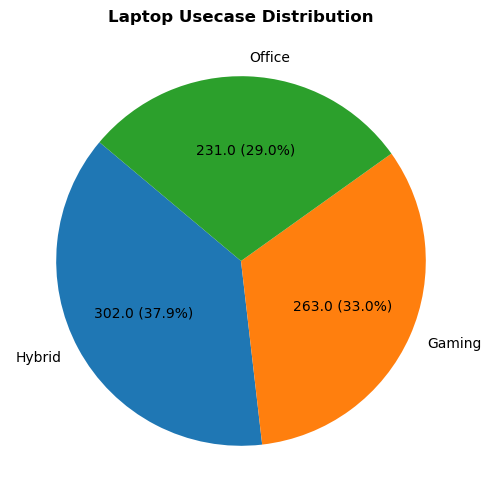

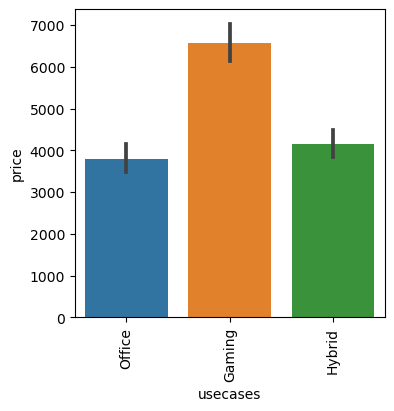

In [34]:
# Count the occurrences of each use case
usecase_counts = laptop['usecases'].value_counts()

# Create the pie chart
def func(pct, allvalues):
    absolute = round(pct / 100.*sum(allvalues), 0)  # Calculate the absolute count
    return f"{absolute} ({pct:.1f}%)"  # Return formatted string

plt.figure(figsize=(6, 6))  # Adjust figure size
plt.pie(
    usecase_counts, 
    labels=usecase_counts.index,  # Add labels for each use case
    autopct=lambda pct: func(pct, usecase_counts),  # Use the custom function
    startangle=140,  # Rotate chart for better appearance
    colors=plt.cm.tab10.colors  # Optional: Use a color map
)
plt.title('Laptop Usecase Distribution', fontsize=12, weight='bold')  # Add the title
plt.show() 



plt.figure(figsize=(4, 4))  # Adjust the size of the figure
sns.barplot(x=new_csv['usecases'], y=new_csv['price'])
plt.xticks(rotation='vertical')
plt.show()

   min_saleprice  max_saleprice
0         879.45       23099.45


c:\Users\aiman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


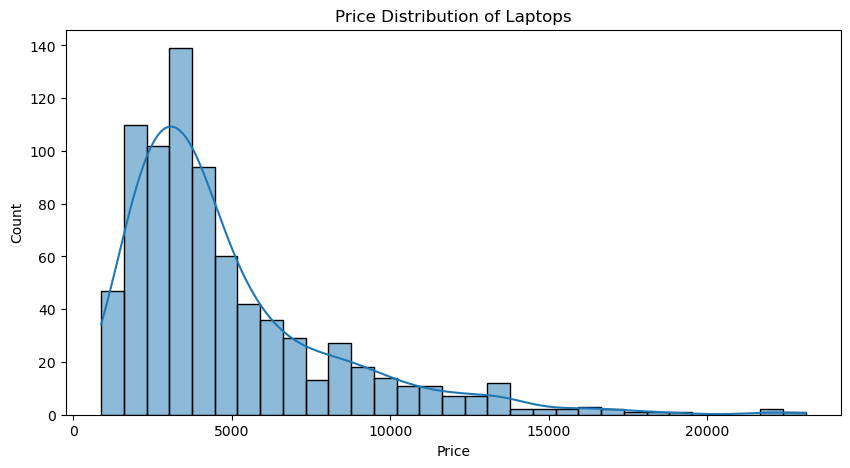

C:\Users\aiman\AppData\Local\Temp\ipykernel_4784\3356294016.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_csv['price'])
c:\Users\aiman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


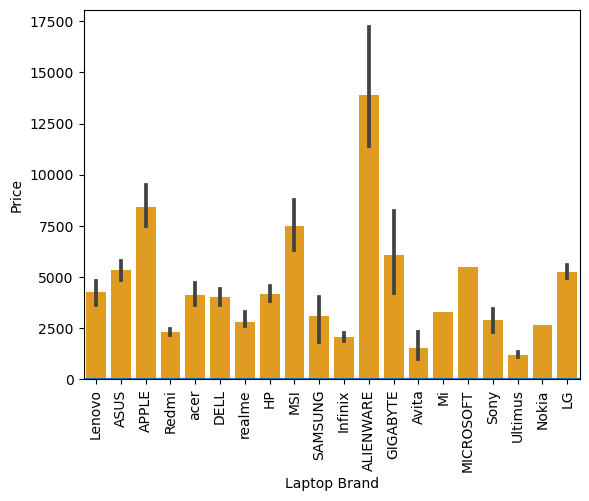

In [35]:
d = {"min_saleprice": [new_csv["price"].min()] ,
     "max_saleprice": [new_csv["price"].max()]
    }
min_max_price=pd.DataFrame(d)
print(min_max_price)

plt.figure(figsize=(10, 5))
sns.histplot(new_csv['price'], kde=True)  # kde=True adds a smooth line
plt.xlabel('Price')  # Label the x-axis as 'Price'
plt.title('Price Distribution of Laptops')
plt.show()

sns.distplot(new_csv['price'])

sns.barplot(x=new_csv['brand'],y=new_csv['price'],color='orange')
plt.xticks(rotation='vertical')
plt.xlabel('Laptop Brand') 
plt.ylabel('Price') 
plt.show()



In [36]:
laptop['price'] = laptop['price'].astype(str) #convert to string

#add RM in front of str
laptop['price'] = laptop['price'].apply(lambda x: f'RM{x}')

print(laptop['price'].value_counts())

price
RM3299.45     13
RM4124.45     11
RM4949.45      9
RM7259.45      8
RM2089.45      8
              ..
RM12094.17     1
RM5581.95      1
RM3234.0       1
RM15179.45     1
RM1349.7       1
Name: count, Length: 449, dtype: int64


### 4.0 TAG CREATION

In [37]:
#COMBINE BRAND, CPU, RAM, STORAGE, OS, DISPLAY, PRICE
laptop['tags'] = (
    laptop['brand'] + " " + 
    laptop['cpu'] + " " + 
    laptop['ram'] + " " + 
    laptop['storage'] + " " + 
    laptop['os'] + " " + 
    laptop['display'] + " " + 
    laptop['usecases'] + " " + 
    laptop['price']
)
laptop.iloc[0]['tags']

'Lenovo i5 16RAM 512GB Windows 15inch Office RM3464.45'

In [38]:
laptop['tags'] = laptop['tags'].apply(lambda x:x.lower()) #convert tags into small letter
laptop.iloc[0]['tags']

'lenovo i5 16ram 512gb windows 15inch office rm3464.45'

In [39]:
#new = laptop[['laptop_id','img_link','name','price_rm','laptop_brand','use','tags', 'processor','ram', 'os', 'storage']]	
#COMBINE BRAND, CPU, RAM, STORAGE, OS, DISPLAY, PRICE
#rec_df = laptop[['laptop_id','name','tags', 'img_link', 'price_rm','brand','usecases', 'processor','ram', 'os', 'storage']] #create a new df and only store 3 specs/attributes

In [40]:
print(laptop.iloc[0]['tags'])

print(laptop['tags'].head(3))

lenovo i5 16ram 512gb windows 15inch office rm3464.45
0    lenovo i5 16ram 512gb windows 15inch office rm...
1    asus ryzen 9 16ram 1000gb windows 15inch gamin...
2    asus i3 8ram 512gb windows 15inch hybrid rm186...
Name: tags, dtype: object


### 4. TF IDF

In [41]:
#use stem to reduce words in the tags column to their base or root forms. For example, "running" might be reduced to "run."
#import nltk
#from nltk.stem import PorterStemmer

ps = PorterStemmer()

def stem(text):
    # Split the string into words and print the result
    split_text = text.split()
    print(f"Split text: {split_text}")  # Display the split text (list of words)
    
    l = []
    for i in split_text:
        l.append(ps.stem(i))
    
    return " ".join(l)

# Print the original 'tags' value for the first row before stemming
print("Original 'tags':", laptop.iloc[0]['tags'])

# Apply stemming to the 'tags' column
laptop['tags'] = laptop['tags'].apply(stem)

# Print the transformed 'tags' value for the first row after stemming
print("Transformed 'tags':", laptop.iloc[0]['tags'])

Original 'tags': lenovo i5 16ram 512gb windows 15inch office rm3464.45
Split text: ['lenovo', 'i5', '16ram', '512gb', 'windows', '15inch', 'office', 'rm3464.45']
Split text: ['asus', 'ryzen', '9', '16ram', '1000gb', 'windows', '15inch', 'gaming', 'rm8909.45']
Split text: ['asus', 'i3', '8ram', '512gb', 'windows', '15inch', 'hybrid', 'rm1869.45']
Split text: ['lenovo', 'integrated', '4ram', '256gb', 'dos', '14inch', 'office', 'rm1044.45']
Split text: ['apple', 'apple', '8ram', '256gb', 'macos', '13inch', 'hybrid', 'rm4784.45']
Split text: ['asus', 'integrated', '4ram', '256gb', 'windows', '14inch', 'office', 'rm1319.45']
Split text: ['lenovo', 'i3', '8ram', '512gb', 'windows', '15inch', 'hybrid', 'rm1869.945']
Split text: ['redmi', 'i5', '8ram', '512gb', 'windows', '15inch', 'office', 'rm2144.45']
Split text: ['acer', 'ryzen', '3', '8ram', '256gb', 'windows', '15inch', 'hybrid', 'rm1484.45']
Split text: ['asus', 'i5', '16ram', '512gb', 'windows', '14inch', 'office', 'rm3684.45']
Split t

In [42]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(laptop['tags']).toarray()

print(laptop.iloc[0]['tags'])

lenovo i5 16ram 512gb window 15inch offic rm3464.45


In [43]:
vector

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [44]:
vector.shape

(796, 532)

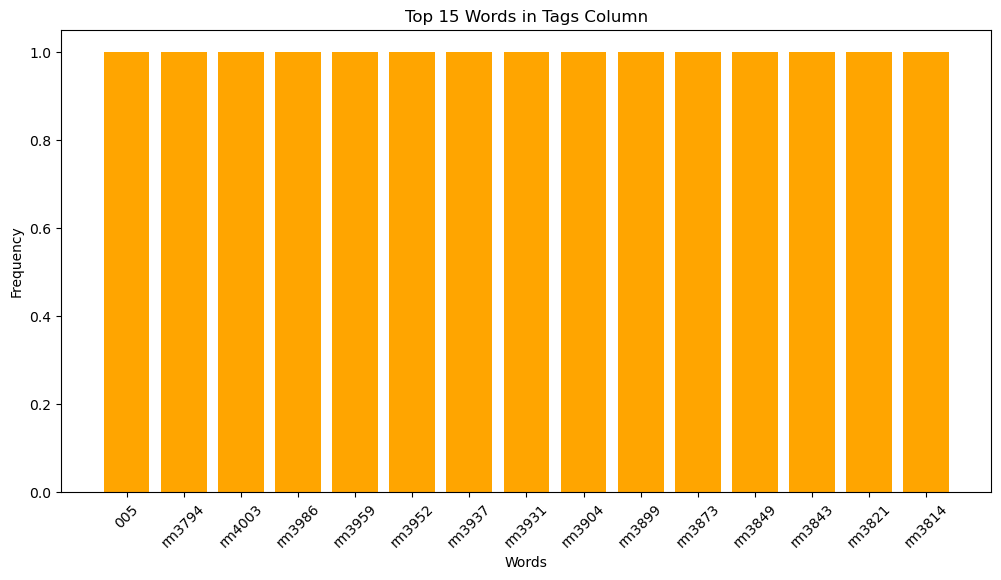

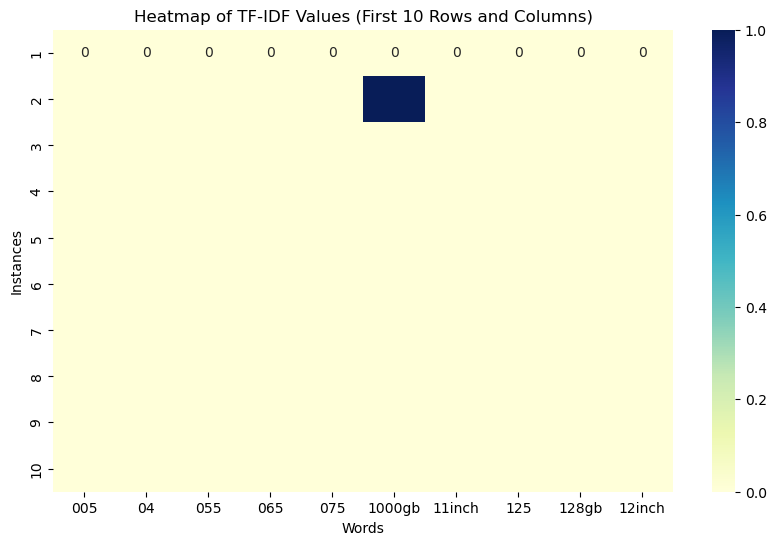

In [45]:
# Get feature names (unique words) and their counts
feature_names = cv.get_feature_names_out()
word_counts = vector.sum(axis=0)  # Sum the occurrences of each word across all rows

# Convert to a DataFrame for visualization
word_freq_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.tolist()[0]})
word_freq_df = word_freq_df.sort_values(by='Count', ascending=False)

# Plot the top 15 words
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:15], word_freq_df['Count'][:15], color='orange')
plt.title('Top 15 Words in Tags Column')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

subset = vector[:10, :10]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset, annot=True, cmap="YlGnBu", xticklabels=feature_names[:10], yticklabels=range(1, 11))
plt.title('Heatmap of TF-IDF Values (First 10 Rows and Columns)')
plt.xlabel('Words')
plt.ylabel('Instances')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    laptop['usecases'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=40, 
                                  max_features=4, 
                                  max_depth=10, 
                                  random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

#Calculate training and testing accuracy
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.2%}")
print(f"Testing Accuracy: {test_acc:.2%}")

#Generate classification report (recall, precision and F1 score)
print('\n',classification_report(y_test, y_pred))


#Cross Validation testing
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.2%}")

#Display sample misclassification
misclassified = X_test[y_test != y_pred]
print("Misclassified samples:", misclassified.shape[0])


Training Accuracy: 99.37%
Testing Accuracy: 98.75%

               precision    recall  f1-score   support

      Gaming       0.97      1.00      0.98        62
      Hybrid       1.00      1.00      1.00        54
      Office       1.00      0.95      0.98        44

    accuracy                           0.99       160
   macro avg       0.99      0.98      0.99       160
weighted avg       0.99      0.99      0.99       160

Cross-validation accuracy: 95.44%
Misclassified samples: 2


In [47]:
#help to know what is the best value/number to increase the accuracy

from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,110,10)

param_grid = {
    'max_features': max_features_range,
    'n_estimators': n_estimators_range
}

grid_search = GridSearchCV(
    estimator = rf_model, 
    param_grid = param_grid, 
    cv = 5, 
    n_jobs=-1, 
    verbose = 2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_features': 4, 'n_estimators': 40}
Best Score: 0.95435531496063


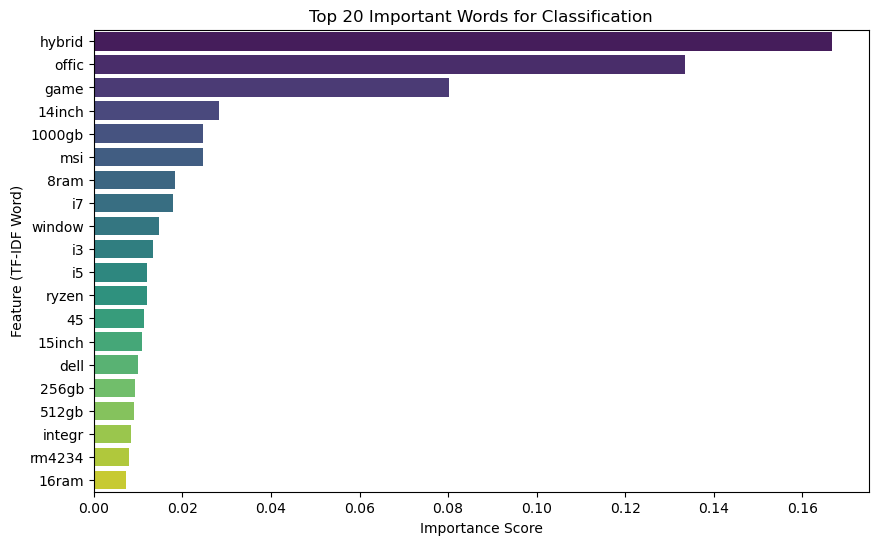

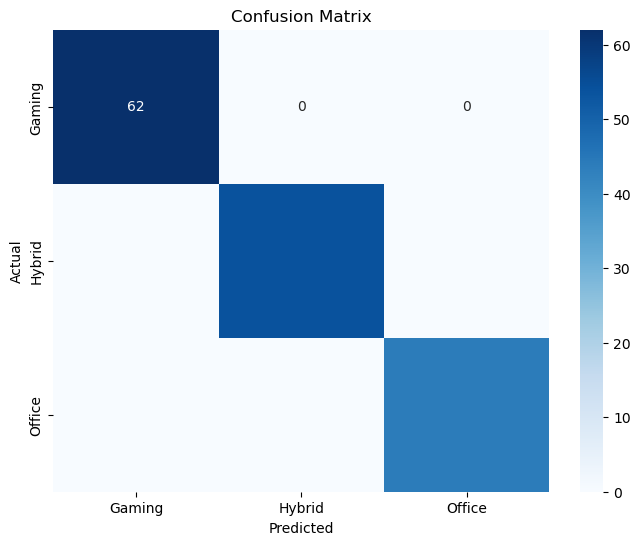

Confusion Matrix:
 [[62  0  0]
 [ 0 54  0]
 [ 0  0 44]]


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Ensure `cv` is your TfidfVectorizer
feature_names = cv.get_feature_names_out()  # Use the TF-IDF vectorizer, not the vectorized output

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20 words

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Feature (TF-IDF Word)')
plt.title('Top 20 Important Words for Classification')
plt.show()



# ----- 1. Confusion Matrix -----
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[62  0  0]
 [ 0 54  0]
 [ 0  0 44]]


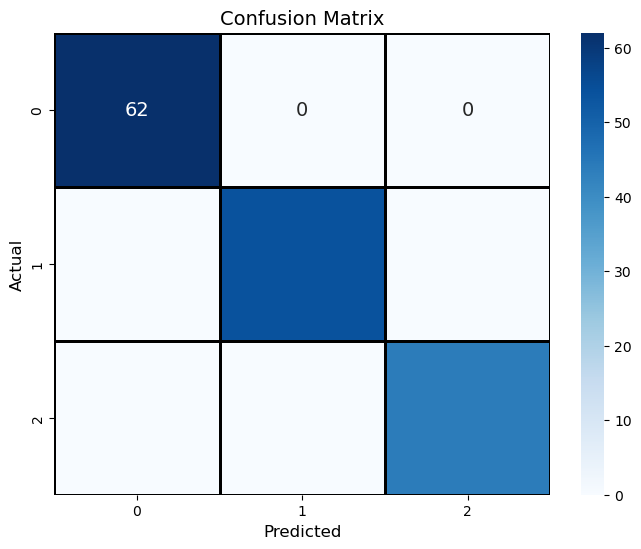

In [65]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))  # Increase figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, linewidths=1, linecolor='black')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [49]:
print("Actual Labels:\n", y_test.values[:10])
print("Predicted Labels:\n", y_pred[:10])

Actual Labels:
 ['Office' 'Office' 'Office' 'Gaming' 'Hybrid' 'Office' 'Office' 'Office'
 'Hybrid' 'Office']
Predicted Labels:
 ['Office' 'Office' 'Office' 'Gaming' 'Hybrid' 'Office' 'Office' 'Office'
 'Hybrid' 'Office']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# ----- 4. Example Recommendations -----
def get_similar_laptops(laptop_index, tfidf_matrix, laptop_df, top_n=5):
    # Ensure the input is 2D before computing similarity
    cosine_similarities = cosine_similarity(tfidf_matrix[laptop_index].reshape(1, -1), tfidf_matrix).flatten()
    
    # Get top N similar laptops (excluding itself)
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]  
    
    print(f"Laptop: {laptop_df.iloc[laptop_index]['name']}")
    print("Recommended Laptops:")
    for i in similar_indices:
        print(f"- {laptop_df.iloc[i]['name']} ({cosine_similarities[i]:.2f} similarity)")

# Example Usage (Recommend similar laptops to the first test instance)
get_similar_laptops(0, vector, laptop)


Laptop: Lenovo Intel Core i5 11th Gen
Recommended Laptops:
- Lenovo IdeaPad Gaming 3 Core i5 10th Gen (0.89 similarity)
- Lenovo IdeaPad Core i5 11th Gen (0.89 similarity)
- ASUS Vivobook 15 OLED (2022) Core i5 12th Gen (0.78 similarity)
- MSI Sword 15 Core i5 12th Gen (0.78 similarity)
- DELL Core i5 11th Gen (0.78 similarity)


In [51]:
from sklearn.metrics.pairwise import cosine_similarity
user_input = "Avita Intel i9 32RAM Windows 128GB 15inch RM3000"
user_input_vector = cv.transform([user_input])

# Calculate cosine similarity between user input and all laptops
similarity_scores = cosine_similarity(user_input_vector, vector).flatten()


# Predict category
predicted_category = rf_model.predict(user_input_vector)[0]
print(f"Predicted Type: {predicted_category}")

# Get the indices of the top 5 laptops
top_5_indices = similarity_scores.argsort()[-5:][::-1]

# Display the top 5 laptops
top_5_laptops = laptop.iloc[top_5_indices]
print("Top 5 Recommended Laptops:")
print(top_5_laptops[['name', 'usecases']])

Predicted Type: Office
Top 5 Recommended Laptops:
                                               name usecases
605                           ASUS Core i9 10th Gen   Office
229                      ALIENWARE Core i9 10th Gen   Gaming
203  ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen   Gaming
780             MSI Raider GE67 HX Core i9 12th Gen   Gaming
228  ASUS ROG Strix Scar 15 (2022) Core i9 12th Gen   Gaming


In [52]:
new_csv.head(1)

,laptop_id,img_link,name,price,brand,usecases,processor,ram,os,storage
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,3464.45,Lenovo,Office,Intel Core i5 Processor (11th Gen),16RAM,Windows,512GB


In [53]:
laptop.columns

Index(['laptop_id', 'name', 'price', 'processor', 'ram', 'storage', 'img_link',
       'display', 'brand', 'os', 'usecases', 'cpu', 'tags'],
      dtype='object')

In [54]:
laptops = pd.merge(laptop, new_csv, on='laptop_id', how='left')


In [55]:
laptop.columns

Index(['laptop_id', 'name', 'price', 'processor', 'ram', 'storage', 'img_link',
       'display', 'brand', 'os', 'usecases', 'cpu', 'tags'],
      dtype='object')

In [56]:
import pickle

# Models Upload

# count vectorizer
with open('model/cv_combined.pkl', 'wb') as f:
    pickle.dump(cv, f)
# completed model
with open('model/model_combined.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
# dataframe
with open('model/df_combined.pkl', 'wb') as f: 
    pickle.dump(laptop, f) 
# vector
with open('model/vector_combined.pkl', 'wb') as f:
    pickle.dump(vector, f) 
# csv dataset
new_csv.to_csv('model/combined.csv', sep=',', index=False, encoding='utf-8')


'''with open('model/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('model/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

with open('model/csv_combined.pkl', 'wb') as f:
    pickle.dump(new_csv, f)'''


"with open('model/X_test.pkl', 'wb') as f:\n    pickle.dump(X_test, f)\n\nwith open('model/y_test.pkl', 'wb') as f:\n    pickle.dump(y_test, f)\n\nwith open('model/csv_combined.pkl', 'wb') as f:\n    pickle.dump(new_csv, f)"

In [57]:
'''pip install scikit-learn==1.6.1'''

'pip install scikit-learn==1.6.1'

In [58]:
'''import joblib
import sklearn

# Save the model and include scikit-learn version
metadata = {"scikit_learn_version": sklearn.__version__}

joblib.dump((rf_model, metadata), 'model/rf_model2_with_version.joblib')
joblib.dump(cv, 'model/count_vectorizer_with_version.joblib')
joblib.dump(rec_df, 'model/rf_df2_with_version.joblib')'''

'import joblib\nimport sklearn\n\n# Save the model and include scikit-learn version\nmetadata = {"scikit_learn_version": sklearn.__version__}\n\njoblib.dump((rf_model, metadata), \'model/rf_model2_with_version.joblib\')\njoblib.dump(cv, \'model/count_vectorizer_with_version.joblib\')\njoblib.dump(rec_df, \'model/rf_df2_with_version.joblib\')'

In [59]:
'''import pickle


pickle.dump(rec_df, open('model/rf_df2.pkl', 'wb')) #dataframe
joblib.dump(rf_model, 'model/rf_model.pkl')
print("Model saved!")'''

'import pickle\n\n\npickle.dump(rec_df, open(\'model/rf_df2.pkl\', \'wb\')) #dataframe\njoblib.dump(rf_model, \'model/rf_model.pkl\')\nprint("Model saved!")'